# Questions 1,2 and 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

Used data are taken from StackOverflow survey done in 2020 - to get some up to date data. The data set features some new column comparing to older survey data.
Now take a look at the summary statistics associated with the quantitative variables in our dataset. 

In [8]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


A picture can often tell us more than numbers.

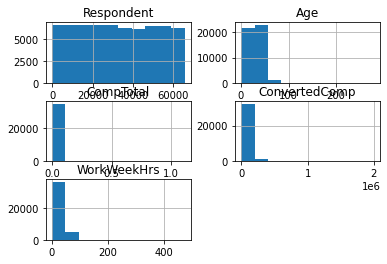

In [9]:
df.hist();

Correlation matrix - no evident colleration appears.

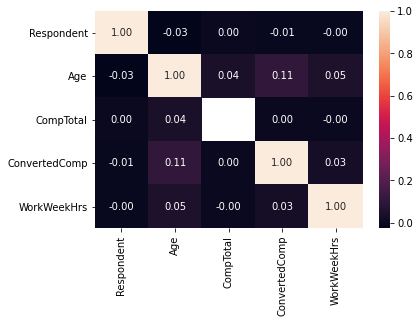

In [10]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

###### Question 1: Which are the "busiest" countries? Which ones are taking overtimes per survey data? 

In [ ]:
Using the DataFrame query to answer my question. Can see some similarities with SQL.

In [114]:
pd.DataFrame(df.query("NEWOvertime == 'Often: 1-2 days per week or more'").groupby(['Country']).count()['Respondent'].sort_values(ascending=False))

,Respondent
Country,
United States,2075
India,1572
Germany,743
United Kingdom,618
France,391
...,...
Burkina Faso,1
Gambia,1
Djibouti,1


In [ ]:
#Answer1: According the results, US, India, Germany, UK and France have the busiest developers.

###### Question 2: Can we predict or find relation between Age, Work Week Hours and Converted Compensation? (Salary converted to annual USD salaries using the exchange rate on 2020-02-19 assuming 12 working months and 50 working weeks.

In [110]:
# Consider only numerical variables
cc_rm = df.dropna(subset=['ConvertedComp'], axis=0)
all_rm = cc_rm.dropna(axis=0)

X = all_rm[['Age', 'WorkWeekHrs']]
y = all_rm['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 

#Predictions
y_test_preds = lm_model.predict(X_test)

#Rsquared
r2_test = r2_score(y_test, y_test_preds)
r2_test

0.017141425732211446

In [ ]:
#Answer 2: Above results are too low to be used for relevant prediction. Larger data set would be needed.

###### Question 3: How will our prediction change when we also take into account the Gender field included in Survey?

In [79]:
Gender_num=df['Gender'].cat.codes
df['Gender_num']=Gender_num

In [111]:
# Considering only numerical variables
cc_rm = df.dropna(subset=['ConvertedComp'], axis=0)
all_rm = cc_rm.dropna(axis=0)

X = all_rm[['Age', 'WorkWeekHrs','Gender_num']]
y = all_rm['ConvertedComp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 

#Predictions
y_test_preds = lm_model.predict(X_test)

#Rsquared
r2_test = r2_score(y_test, y_test_preds)
r2_test

0.017133194074565705

In [ ]:
#Answer 3: Gender didn't introduce any change in prediction! Still the data set should be larger for relevant prediction.